In [2]:
import pandas as pd


In [5]:
data = pd.read_csv("test.csv")


In [6]:
print("Dataset shape:", data.shape)
print("\nColumns:", data.columns)


Dataset shape: (11399, 19)

Columns: Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City'],
      dtype='object')


In [9]:
# Drop rows with missing values
data = data.dropna(subset=['Delivery_person_ID', 'Time_Orderd', 'Time_Order_picked', 'Weatherconditions'])

# Convert Time columns with format specified
data['Time_Orderd'] = pd.to_datetime(data['Time_Orderd'], format='%I:%M %p', errors='coerce')
data['Time_Order_picked'] = pd.to_datetime(data['Time_Order_picked'], format='%I:%M %p', errors='coerce')

# Drop rows where time conversion failed
data = data.dropna(subset=['Time_Orderd', 'Time_Order_picked'])

# Calculate delivery duration in minutes
data['Delivery_Duration'] = (data['Time_Order_picked'] - data['Time_Orderd']).dt.total_seconds() / 60


In [10]:
print(data['Time_Orderd'].head(10))


1    2025-04-07 20:30:00
2    2025-04-07 19:35:00
3    2025-04-07 17:15:00
4    2025-04-07 18:25:00
5    2025-04-07 09:45:00
6    2025-04-07 10:00:00
7    2025-04-07 18:00:00
8    2025-04-07 21:30:00
9    2025-04-07 20:45:00
10   2025-04-07 14:35:00
Name: Time_Orderd, dtype: datetime64[ns]


In [12]:
average_time = data['Delivery_Duration'].mean()
print(" Average Delivery Time (minutes):", round(average_time, 2))


 Average Delivery Time (minutes): -16.52


In [13]:
fastest_delivery = data.groupby('Delivery_person_ID')['Delivery_Duration'].mean().sort_values().head()
print("🚴‍♂️ Top 5 Fastest Delivery Persons:\n", fastest_delivery)


🚴‍♂️ Top 5 Fastest Delivery Persons:
 Delivery_person_ID
AGRRES05DEL03     -1425.000000
DEHRES04DEL03     -1425.000000
AURGRES01DEL03     -951.666667
ALHRES07DEL03      -715.000000
AGRRES11DEL03      -710.000000
Name: Delivery_Duration, dtype: float64


In [14]:
weather_effect = data.groupby('Weatherconditions')['Delivery_Duration'].mean()
print("🌦️ Average Delivery Time by Weather:\n", weather_effect)


🌦️ Average Delivery Time by Weather:
 Weatherconditions
conditions Cloudy       -21.627137
conditions Fog          -11.449568
conditions Sandstorms   -10.548546
conditions Stormy       -20.212224
conditions Sunny        -16.363873
conditions Windy        -18.715717
Name: Delivery_Duration, dtype: float64


In [15]:
traffic_effect = data.groupby('Road_traffic_density')['Delivery_Duration'].mean()
print("🚦 Average Delivery Time by Traffic:\n", traffic_effect)


🚦 Average Delivery Time by Traffic:
 Road_traffic_density
High        9.893321
Jam        10.165447
Low       -67.210722
Medium      9.996288
Name: Delivery_Duration, dtype: float64


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set full vibrant style
sns.set_style("whitegrid")
plt.style.use('ggplot')  # or try 'seaborn', 'fivethirtyeight', 'bmh'
  # Or try 'ggplot', 'seaborn-poster', etc.


C:\Users\madha\AppData\Local\Temp\ipykernel_14324\3695275215.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time_Orderd'] = pd.to_datetime(data['Time_Orderd'], errors='coerce')
C:\Users\madha\AppData\Local\Temp\ipykernel_14324\3695275215.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time_Order_picked'] = pd.to_datetime(data['Time_Order_picked'], errors='coerce')
C:\Users\madha\AppData\Local\Temp\ipykernel_14324\3695275215.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weatherconditions', y='Delivery_Duration', data=data, palette='

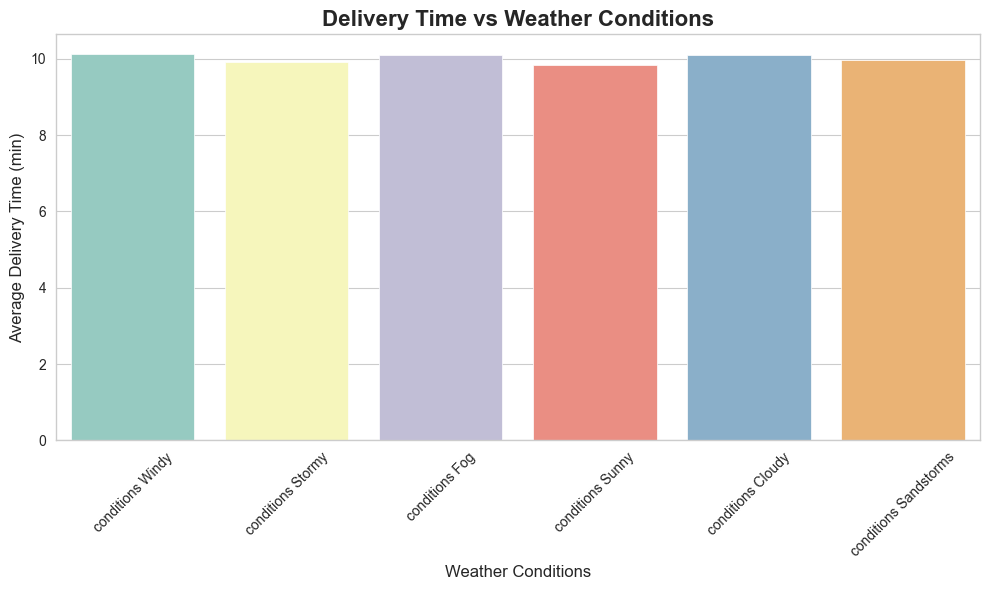

C:\Users\madha\AppData\Local\Temp\ipykernel_14324\3695275215.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Road_traffic_density', y='Delivery_Duration', data=data, palette='coolwarm')


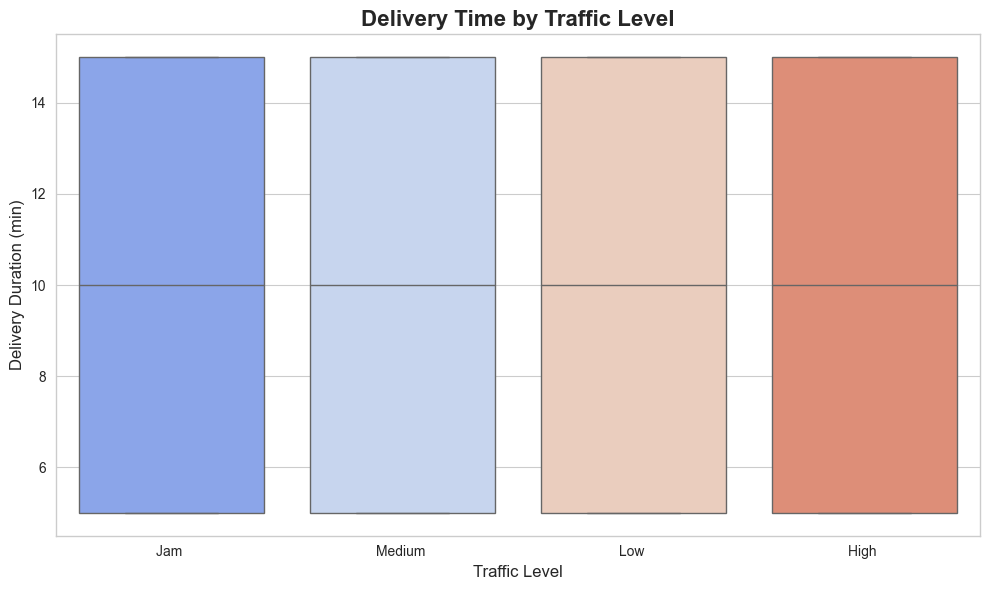

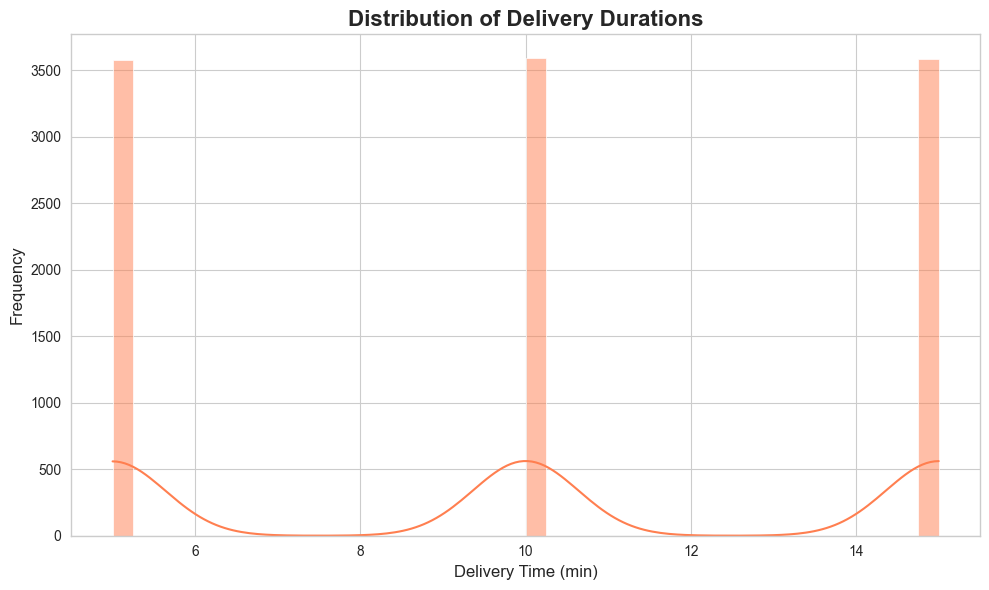

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("test.csv")

# Data Cleaning
data['Time_Orderd'] = pd.to_datetime(data['Time_Orderd'], errors='coerce')
data['Time_Order_picked'] = pd.to_datetime(data['Time_Order_picked'], errors='coerce')
data.dropna(subset=['Time_Orderd', 'Time_Order_picked'], inplace=True)
data['Delivery_Duration'] = (data['Time_Order_picked'] - data['Time_Orderd']).dt.total_seconds() / 60
data = data[data['Delivery_Duration'] > 0]

# Plot 1: Weather vs Delivery Time
plt.figure(figsize=(10,6))
sns.barplot(x='Weatherconditions', y='Delivery_Duration', data=data, palette='Set3', errorbar=None)
plt.title('Delivery Time vs Weather Conditions', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('Weather Conditions')
plt.ylabel('Average Delivery Time (min)')
plt.tight_layout()
plt.savefig("weather_plot.png")
plt.show()

# Plot 2: Traffic vs Delivery Time
plt.figure(figsize=(10,6))
sns.boxplot(x='Road_traffic_density', y='Delivery_Duration', data=data, palette='coolwarm')
plt.title('Delivery Time by Traffic Level', fontsize=16, fontweight='bold')
plt.xlabel('Traffic Level')
plt.ylabel('Delivery Duration (min)')
plt.tight_layout()
plt.savefig("traffic_plot.png")
plt.show()

# Plot 3: Distribution of Delivery Durations
plt.figure(figsize=(10,6))
sns.histplot(data['Delivery_Duration'], bins=40, kde=True, color='coral')
plt.title('Distribution of Delivery Durations', fontsize=16, fontweight='bold')
plt.xlabel('Delivery Time (min)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("duration_hist.png")
plt.show()
